## Tushar Goyal - B18030 - CSE

In [15]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics.cluster import contingency_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn

In [14]:
digits = load_digits()
data = scale(digits.data)
reduced_data = PCA(n_components=2).fit_transform(data)

In [3]:
reduced_data


array([[ 1.91421135, -0.95454281],
       [ 0.58902406,  0.92431363],
       [ 1.30208062, -0.31738901],
       ...,
       [ 1.0226375 , -0.14825884],
       [ 1.07609138, -0.38121361],
       [-1.2577246 , -2.22753209]])

In [4]:
model = KMeans(n_clusters = 10)
model.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
labels = model.predict(reduced_data)

In [6]:
model.inertia_

2815.7840740452793

In [8]:
model.labels_.astype(float)

array([1., 0., 1., ..., 1., 1., 4.])

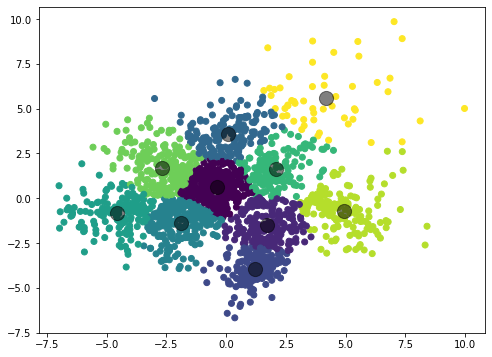

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=model.labels_.astype(float))
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## How many clusters to choose?
● A good clustering has tight clusters (so low inertia)

● ... but not too many clusters!

● Choose an "elbow" in the inertia plot

● Where inertia begins to decrease more slowly

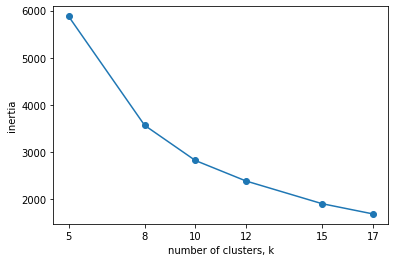

In [9]:
ks = [5,8,10,12,15,17]
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model_t = KMeans(n_clusters=k)
    
    # Fit model to samples
    model_t.fit(reduced_data)
    
    # Append the inertia to the list of inertias
    inertias.append(model_t.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [10]:
gmm = GaussianMixture(n_components=5)
gmm.fit(reduced_data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

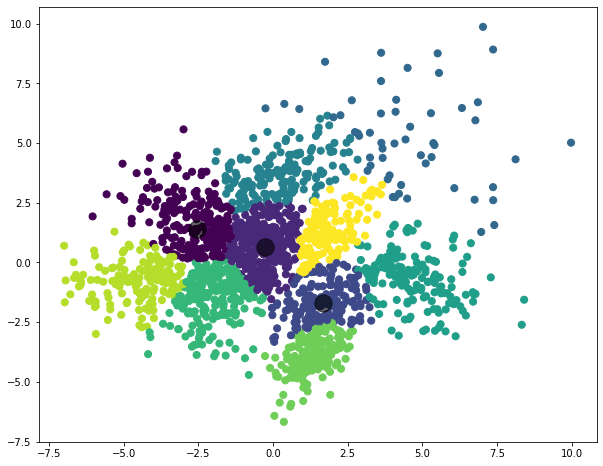

In [11]:
gmm = GaussianMixture(n_components=10, covariance_type='full').fit(reduced_data)
prediction_gmm = gmm.predict(reduced_data)


centers = np.zeros((3,2))
for i in range(3):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(reduced_data)
    centers[i, :] = reduced_data[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6)

In [15]:
prediction_gmm

array([2, 1, 1, ..., 1, 1, 1], dtype=int32)

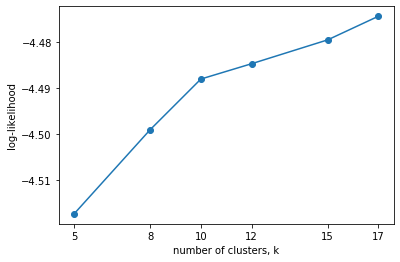

In [37]:
ks =[5,8,10,12,15,17]
scores = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model_t = GaussianMixture(n_components=k, covariance_type='full')
    
    # Fit model to samples
    model_t.fit(reduced_data)
    prediction_gmm = model_t.predict(reduced_data)
    # Append the inertia to the list of inertias
    scores.append(model_t.score(reduced_data))
    
# Plot ks vs inertias
plt.plot(ks, scores, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('log-likelihood')
plt.xticks(ks)
plt.show()

###### In statistics, a contingency table (also known as a cross tabulation or crosstab) is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables

In [34]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    cmat =contingency_matrix(y_true, y_pred)
    # return purity
    print(cmat)
    print()
    print(np.amax(cmat,axis=0))
    print()
    print(np.sum(np.amax(cmat,axis=0)))
    return np.sum(np.amax(cmat,axis=0))/np.sum(cmat)

In [35]:
purity_score(digits.target,prediction_gmm)

[[  0   2 119   0   0   7   3  39   0   8]
 [  0  76   3   1   4   1  29   0   0  68]
 [ 20   8   1   0   1   0  34   0 107   6]
 [ 78   8   3   0  14   0  39   0  41   0]
 [  2   1  10  10   0 151   0   0   0   7]
 [ 64  57   9   0  14   1  26   0   2   9]
 [  0   0  19   0   0   1   0 161   0   0]
 [ 11  17   0  29 111   0   0   0   0  11]
 [ 29  86   3   0   4   0  29   0   2  21]
 [ 24  54   1  14  11   0  59   0   8   9]]

[ 78  86 119  29 111 151  59 161 107  68]

969


0.5392320534223706

In [37]:
df = pd.DataFrame({'labels':prediction_gmm ,'varieties': digits.target})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)
print()
print(ct.values)
print()
print(np.amax(ct.values,axis=1))
print(np.sum(np.amax(ct.values,axis=1)))


varieties    0   1    2   3    4   5    6    7   8   9
labels                                                
0            0   0   20  78    2  64    0   11  29  24
1            2  76    8   8    1  57    0   17  86  54
2          119   3    1   3   10   9   19    0   3   1
3            0   1    0   0   10   0    0   29   0  14
4            0   4    1  14    0  14    0  111   4  11
5            7   1    0   0  151   1    1    0   0   0
6            3  29   34  39    0  26    0    0  29  59
7           39   0    0   0    0   0  161    0   0   0
8            0   0  107  41    0   2    0    0   2   8
9            8  68    6   0    7   9    0   11  21   9

[[  0   0  20  78   2  64   0  11  29  24]
 [  2  76   8   8   1  57   0  17  86  54]
 [119   3   1   3  10   9  19   0   3   1]
 [  0   1   0   0  10   0   0  29   0  14]
 [  0   4   1  14   0  14   0 111   4  11]
 [  7   1   0   0 151   1   1   0   0   0]
 [  3  29  34  39   0  26   0   0  29  59]
 [ 39   0   0   0   0   0 161   0   0 

In [24]:
import pandas as pd

In [42]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [43]:
prediction_gmm

array([ 9, 13,  9, ...,  9,  9,  6], dtype=int32)

In [46]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
`